# Binary Heap(二叉堆)
## What is Binary Heap?
binary heap is a data structure to implement a **priority queue**  
priority queue like queue but items  has priority inside, the best priority the first out.  
binary heap can implement O(logn)
#### two variation
- min heap: the smalllest key at the front  
- max heap: the largest key at the front

#### complete binary tree
In our heap implementation we keep the tree balanced by creating a complete binary tree. A complete binary tree is a tree in which **each level has all of its nodes**. The exception to this is the **bottom level of the tree, which we fill in from `left to right`**.

`Like a Stack, the top is the best priority then left to right`
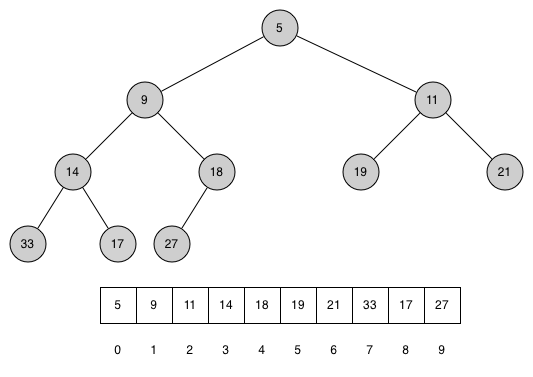
As you can see from the picture, the parent position is **p**, the left child in **2p+1**, the right child in **2p+2**.

so give the child node position **n**, the parent's node position is **(n-1)//2**


In [2]:
class BinaryHeap:
    def __init__(self):
        self.heap = []
        
    def perc_up(self,cur_idx):
        while (cur_idx - 1) // 2 >= 0:
            parent_idx = (cur_idx - 1) // 2
            if self.heap[cur_idx] < self.heap[parent_idx]:
                self.heap[cur_idx],self.heap[parent_idx] = self.heap[parent_idx],self.heap[cur_idx]
            cur_idx = parent_idx
            
    def perc_down(self,cur_idx):
        while 2 * cur_idx + 1 < len(self.heap):
            min_child_idx = self.get_min_child(cur_idx)
            if self.heap[cur_idx] > self.heap[min_child_idx]:
                self.heap[cur_idx],self.heap[min_child_idx] = self.heap[min_child_idx],self.heap[cur_idx]
            else:
                return
            cur_idx = min_child_idx
    
    def get_min_child(self,parent_idx):
        if 2 * parent_idx + 2 > len(self.heap) - 1:
            return 2 * parent_idx + 1
        if self.heap[2 * parent_idx + 1] < self.heap[2 * parent_idx + 2]:
            return 2 * parent_idx + 1
        return 2*parent_idx + 2
    
    '''
    The easiest, and most efficient, way to add an item to a list 
    is to simply append the item to the end of the list.
    '''
    def insert(self,item):
        self.heap.append(item)
        self.perc_up(len(self.heap) - 1)
    
    def delete(self):
        self.heap[0],self.heap[-1] = self.heap[-1],self.heap[0]
        result = self.heap.pop()
        self.perc_down(0)
        return result
    
    def heapify(self,not_a_heap):
        self.heap = not_a_heap[:]
        cur_idx = len(self.heap) // 2 - 1
        while cur_idx >= 0:
            self.perc_down(cur_idx)
            cur_idx -= 1
            
    def is_empty(self):
        return not bool(self._heap)